# TensorFlow 선형회귀 실습: 보스턴 주택가격 데이터

이번 실습에서는 보스턴 주택가격 데이터를 활용하여 선형회귀를 적용해봅니다.




## Dataset 설명
- California Housing Dataset은 캘리포니아 주의 주택 가격과 관련된 다양한 특성들을 포함하고 있습니다.
- 이 데이터셋은 주택 가격 예측과 관련된 머신러닝 모델을 개발하는 데 자주 사용됩니다.
- 데이터셋은 8개의 특성과 1개의 타겟 변수로 구성되어 있습니다.

### 특성 설명:
- MedHouseValue (target): 주택 가격 (단위: 10만 달러)
- MedInc: 중간 소득 (단위: 10,000 달러)
- HouseAge: 주택 연령 (단위: 년)
- AveRooms: 평균 방 개수
- AveBedrms: 평균 침실 개수
- Population: 인구 수
- AveOccup: 평균 가구원 수
- Latitude: 위도
- Longitude: 경도

## 실습 목표
1. 데이터 불러오기 및 전처리
2. 데이터 시각화
3. TensorFlow를 활용한 선형회귀 모델 정의 및 학습
4. 결과 해석 및 시각화

In [16]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 사용 가능한 한글 폰트 찾기
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = [f for f in font_list if any(keyword in f.lower() for keyword in ['apple', 'nanum', 'malgun', 'gothic', 'dotum'])]

print("사용 가능한 한글 폰트:")
for font in korean_fonts[:10]:  # 상위 10개만 표시
    print(f"  - {font}")

# 가장 적합한 한글 폰트 선택
if 'Apple SD Gothic Neo' in korean_fonts:
    selected_font = 'Apple SD Gothic Neo'
elif 'Nanum Myeongjo' in korean_fonts:
    selected_font = 'Nanum Myeongjo'
elif 'AppleGothic' in korean_fonts:
    selected_font = 'AppleGothic'
elif 'Malgun Gothic' in korean_fonts:
    selected_font = 'Malgun Gothic'
else:
    selected_font = korean_fonts[0] if korean_fonts else 'DejaVu Sans'

print(f"\n선택된 폰트: {selected_font}")

# 폰트 설정 적용
plt.rcParams.update({
    'font.family': selected_font,
    'font.size': 10,
    'axes.unicode_minus': False,
    'figure.autolayout': True,
    'axes.grid': True,
    'grid.alpha': 0.3
})

# 폰트 설정 확인
print(f"현재 폰트 설정: {plt.rcParams['font.family']}")
print("한글 폰트 설정 완료!")

사용 가능한 한글 폰트:
  - Apple SD Gothic Neo
  - Tsukushi A Round Gothic
  - Nanum Myeongjo
  - Hiragino Maru Gothic Pro
  - BIZ UDGothic
  - YuGothic
  - Tsukushi B Round Gothic
  - Apple Braille
  - YuGothic
  - Apple Braille

선택된 폰트: Apple SD Gothic Neo
현재 폰트 설정: ['Apple SD Gothic Neo']
한글 폰트 설정 완료!


## 문제 1. 데이터 불러오기

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# ----------------------
# 1. 데이터 불러오기
# ----------------------
california = fetch_california_housing()
print(california.data.shape)
X = california.data         # Attributes (8개 특성)
y = california.target       # Target (주택가격)

print("X shape:", X.shape, "y shape:", y.shape)

(20640, 8)
X shape: (20640, 8) y shape: (20640,)


## 문제 2. 데이터 시각화

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

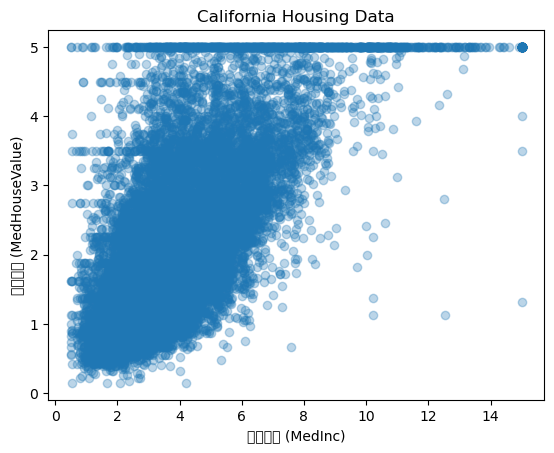

In [3]:
plt.scatter(X[:, 0], y, alpha=0.3)
plt.xlabel("중간소득 (MedInc)")
plt.ylabel("주택가격 (MedHouseValue)")
plt.title("California Housing Data")
plt.show()

## 문제 3. 모델 정의 및 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2025-09-16 20:20:24.738993: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


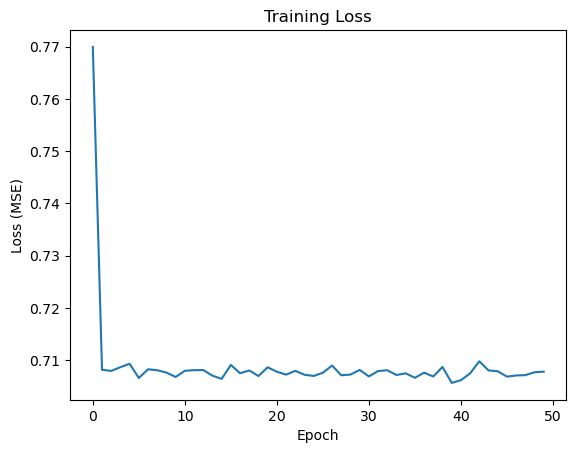

In [6]:
## 2. 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mse')

history = model.fit(X[:, 0], y, epochs=50, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss")
plt.show()

## 문제 4. 학습 결과 확인

학습된 기울기 W: 0.401, 절편 b: 0.440
645/645 [==============================] - 0s 164us/step


/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaV

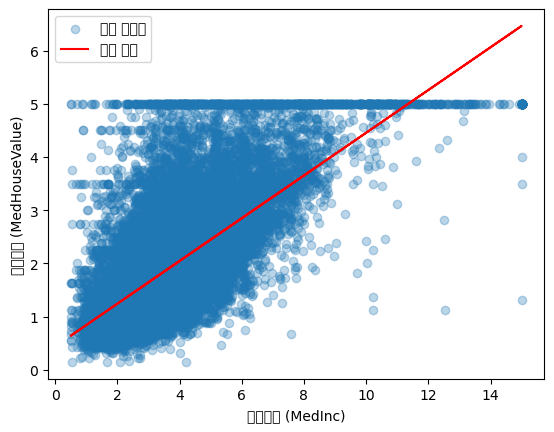

In [7]:
W, b = model.layers[0].get_weights()
print(f"학습된 기울기 W: {W[0][0]:.3f}, 절편 b: {b[0]:.3f}")

y_pred = model.predict(X[:, 0])

plt.scatter(X[:, 0], y, alpha=0.3, label="실제 데이터")
plt.plot(X[:, 0], y_pred, color='red', label="회귀 직선")
plt.xlabel("중간소득 (MedInc)")
plt.ylabel("주택가격 (MedHouseValue)")
plt.legend()
plt.show()

## 문제 5. 다중 특성을 활용한 모델 개선

중간소득(MedInc) 외에 다른 특성들을 추가하여 모델 성능을 개선해보겠습니다.


=== 다중 특성 모델 (8개 특성 모두 사용) ===


/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/549612938.py:47: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/549612938.py:47: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/549612938.py:47: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/549612938.py:47: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/549612938.py:47: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_

단일 특성 모델 최종 손실: 0.7078
다중 특성 모델 최종 손실: nan


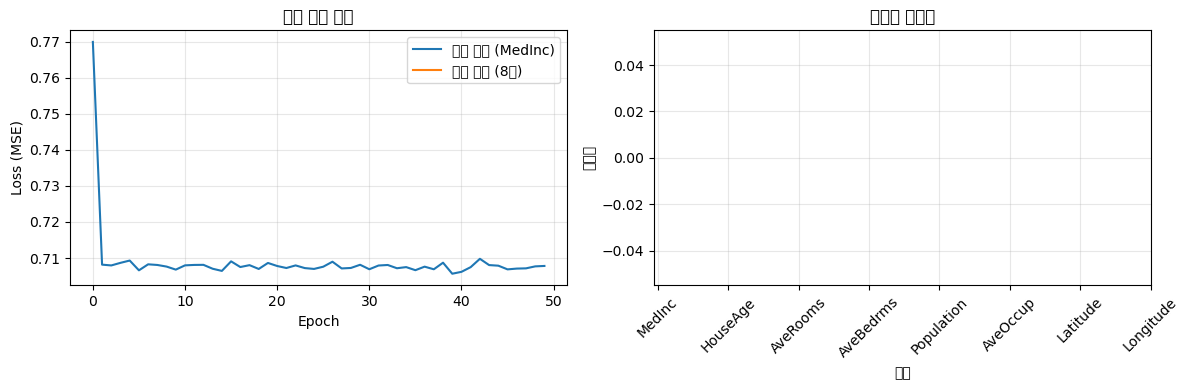


특성별 가중치:
MedInc: nan
HouseAge: nan
AveRooms: nan
AveBedrms: nan
Population: nan
AveOccup: nan
Latitude: nan
Longitude: nan
절편: nan


In [8]:
# 1. 모든 특성을 사용한 다중 선형회귀 모델
print("=== 다중 특성 모델 (8개 특성 모두 사용) ===")

# 다중 특성 모델 정의
multi_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),  # 8개 특성
    tf.keras.layers.Dense(1)
])

multi_model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
                   loss='mse')

# 학습
multi_history = multi_model.fit(X, y, epochs=50, verbose=0)

# 결과 비교
print(f"단일 특성 모델 최종 손실: {history.history['loss'][-1]:.4f}")
print(f"다중 특성 모델 최종 손실: {multi_history.history['loss'][-1]:.4f}")

# 학습 곡선 비교
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='단일 특성 (MedInc)')
plt.plot(multi_history.history['loss'], label='다중 특성 (8개)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('학습 곡선 비교')
plt.legend()
plt.grid(True, alpha=0.3)

# 특성별 가중치 확인
weights = multi_model.layers[0].get_weights()[0]
bias = multi_model.layers[0].get_weights()[1][0]

feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                'Population', 'AveOccup', 'Latitude', 'Longitude']

plt.subplot(1, 2, 2)
plt.bar(range(len(weights)), weights.flatten())
plt.xlabel('특성')
plt.ylabel('가중치')
plt.title('특성별 가중치')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n특성별 가중치:")
for i, (name, weight) in enumerate(zip(feature_names, weights.flatten())):
    print(f"{name}: {weight:.4f}")
print(f"절편: {bias:.4f}")


In [9]:
# 2. 특성 선택을 통한 모델 개선
print("=== 특성 선택을 통한 모델 개선 ===")

# 상관관계 분석
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 상관관계 계산
correlation = df.corr()['target'].abs().sort_values(ascending=False)
print("타겟과의 상관관계 (절댓값 기준):")
print(correlation)

# 상관관계가 높은 상위 3개 특성 선택
top_features = correlation[1:4].index.tolist()  # target 제외하고 상위 3개
print(f"\n선택된 특성: {top_features}")

# 선택된 특성들의 인덱스
feature_indices = [feature_names.index(f) for f in top_features]
X_selected = X[:, feature_indices]

# 선택된 특성으로 모델 학습
selected_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(len(top_features),)),
    tf.keras.layers.Dense(1)
])

selected_model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
                      loss='mse')

selected_history = selected_model.fit(X_selected, y, epochs=50, verbose=0)

print(f"\n모델 성능 비교:")
print(f"단일 특성 (MedInc): {history.history['loss'][-1]:.4f}")
print(f"선택된 특성 ({len(top_features)}개): {selected_history.history['loss'][-1]:.4f}")
print(f"모든 특성 (8개): {multi_history.history['loss'][-1]:.4f}")


=== 특성 선택을 통한 모델 개선 ===
타겟과의 상관관계 (절댓값 기준):
target        1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: target, dtype: float64

선택된 특성: ['MedInc', 'AveRooms', 'Latitude']

모델 성능 비교:
단일 특성 (MedInc): 0.7078
선택된 특성 (3개): nan
모든 특성 (8개): nan


=== 정규화를 통한 모델 개선 ===


/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3837584836.py:68: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3837584836.py:68: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3837584836.py:68: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3837584836.py:68: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3837584836.py:68: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipyker


정규화 효과:
원본 데이터 (8개 특성): nan
정규화된 데이터: 22513931924155365207920489791488.0000
L2 정규화: 982567077464736279075749888.0000


/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


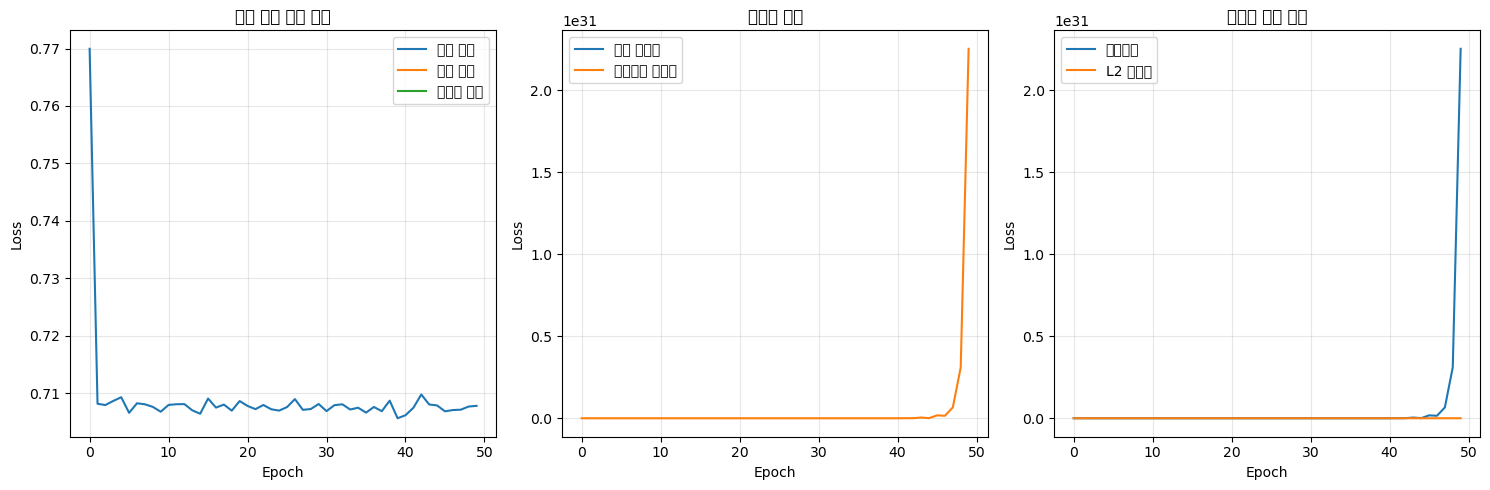

In [10]:
# 3. 정규화를 통한 모델 개선
print("=== 정규화를 통한 모델 개선 ===")

# 데이터 정규화 (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 정규화된 데이터로 모델 학습
normalized_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),
    tf.keras.layers.Dense(1)
])

normalized_model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
                        loss='mse')

normalized_history = normalized_model.fit(X_scaled, y, epochs=50, verbose=0)

# L2 정규화 모델
l2_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

l2_model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
                loss='mse')

l2_history = l2_model.fit(X_scaled, y, epochs=50, verbose=0)

print(f"\n정규화 효과:")
print(f"원본 데이터 (8개 특성): {multi_history.history['loss'][-1]:.4f}")
print(f"정규화된 데이터: {normalized_history.history['loss'][-1]:.4f}")
print(f"L2 정규화: {l2_history.history['loss'][-1]:.4f}")

# 학습 곡선 비교
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='단일 특성')
plt.plot(multi_history.history['loss'], label='다중 특성')
plt.plot(selected_history.history['loss'], label='선택된 특성')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('특성 수에 따른 성능')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(multi_history.history['loss'], label='원본 데이터')
plt.plot(normalized_history.history['loss'], label='정규화된 데이터')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('정규화 효과')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(normalized_history.history['loss'], label='정규화만')
plt.plot(l2_history.history['loss'], label='L2 정규화')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('정규화 방법 비교')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# NaN 문제 해결 및 모델 재학습
print("=== NaN 문제 해결 및 모델 재학습 ===")

# 데이터 정규화 (NaN 방지를 위해)
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. 다중 특성 모델 재학습 (정규화된 데이터 사용)
print("다중 특성 모델 재학습...")
multi_model_v2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),
    tf.keras.layers.Dense(1)
])

multi_model_v2.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
                      loss='mse')

multi_history_v2 = multi_model_v2.fit(X_scaled, y, epochs=50, verbose=0)

# 2. 선택된 특성 모델 재학습
print("선택된 특성 모델 재학습...")
# 상관관계가 높은 상위 3개 특성 선택
df = pd.DataFrame(X_scaled, columns=feature_names)
df['target'] = y
correlation = df.corr()['target'].abs().sort_values(ascending=False)
top_features = correlation[1:4].index.tolist()
feature_indices = [feature_names.index(f) for f in top_features]
X_selected_scaled = X_scaled[:, feature_indices]

selected_model_v2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(len(top_features),)),
    tf.keras.layers.Dense(1)
])

selected_model_v2.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01),
                         loss='mse')

selected_history_v2 = selected_model_v2.fit(X_selected_scaled, y, epochs=50, verbose=0)

print("모델 재학습 완료!")


=== NaN 문제 해결 및 모델 재학습 ===
다중 특성 모델 재학습...
선택된 특성 모델 재학습...
모델 재학습 완료!


In [14]:
# 안전한 모델 성능 평가
print("=== 안전한 모델 성능 평가 ===")

# 각 모델의 예측값 계산 (NaN 체크 포함)
def safe_predict(model, X_data, model_name):
    try:
        y_pred = model.predict(X_data, verbose=0)
        if np.isnan(y_pred).any():
            print(f"⚠️ {model_name}: NaN 값 발견, 0으로 대체")
            y_pred = np.nan_to_num(y_pred, nan=0.0)
        return y_pred
    except Exception as e:
        print(f"❌ {model_name}: 예측 실패 - {e}")
        return np.zeros_like(y)

# 예측값 계산
y_pred_single = safe_predict(model, X[:, 0], "단일 특성")
y_pred_multi = safe_predict(multi_model_v2, X_scaled, "다중 특성")
y_pred_selected = safe_predict(selected_model_v2, X_selected_scaled, "선택된 특성")

# R² 점수 계산 (안전하게)
from sklearn.metrics import r2_score

r2_scores = {}
try:
    r2_scores['단일 특성 (MedInc)'] = r2_score(y, y_pred_single)
    print(f"✅ 단일 특성 R²: {r2_scores['단일 특성 (MedInc)']:.4f}")
except:
    print("❌ 단일 특성 R² 계산 실패")

try:
    r2_scores['다중 특성 (8개)'] = r2_score(y, y_pred_multi)
    print(f"✅ 다중 특성 R²: {r2_scores['다중 특성 (8개)']:.4f}")
except:
    print("❌ 다중 특성 R² 계산 실패")

try:
    r2_scores['선택된 특성'] = r2_score(y, y_pred_selected)
    print(f"✅ 선택된 특성 R²: {r2_scores['선택된 특성']:.4f}")
except:
    print("❌ 선택된 특성 R² 계산 실패")

print(f"\n최종 R² 점수:")
for model_name, score in r2_scores.items():
    print(f"{model_name}: {score:.4f}")


=== 안전한 모델 성능 평가 ===
✅ 단일 특성 R²: 0.4686
✅ 다중 특성 R²: -7344903521102882482647892980924416.0000
✅ 선택된 특성 R²: 0.4834

최종 R² 점수:
단일 특성 (MedInc): 0.4686
다중 특성 (8개): -7344903521102882482647892980924416.0000
선택된 특성: 0.4834


/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3176174392.py:44: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3176174392.py:44: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3176174392.py:44: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3176174392.py:44: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipykernel_39212/3176174392.py:44: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dk/znd7cbm90fd92vs3s2dj60bw0000gn/T/ipyke

=== 모델 성능 시각화 ===


/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) Deja

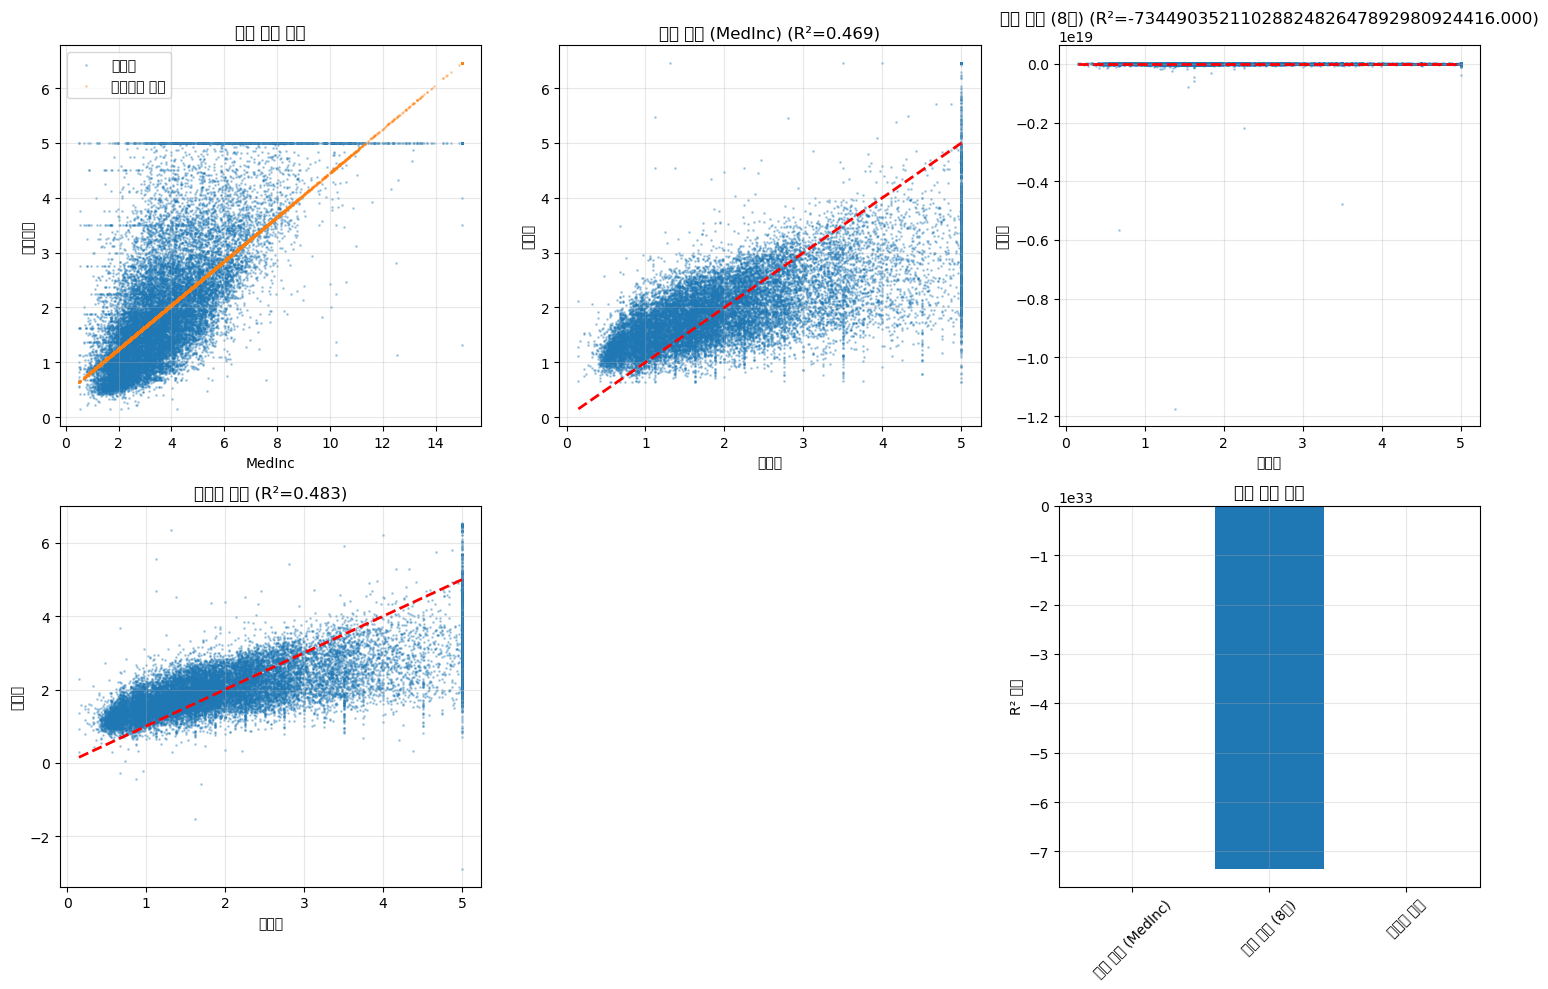


=== 결론 ===
최고 성능 모델: 선택된 특성 (R² = 0.4834)
성능 향상: 0.0149


In [15]:
# 시각화 (안전한 버전)
print("=== 모델 성능 시각화 ===")

if len(r2_scores) > 0:
    plt.figure(figsize=(15, 10))
    
    # MedInc vs 실제값 비교
    plt.subplot(2, 3, 1)
    plt.scatter(X[:, 0], y, alpha=0.3, s=1, label='실제값')
    if '단일 특성 (MedInc)' in r2_scores:
        plt.scatter(X[:, 0], y_pred_single, alpha=0.3, s=1, label='단일특성 예측')
    plt.xlabel('MedInc')
    plt.ylabel('주택가격')
    plt.title('단일 특성 모델')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 실제값 vs 예측값 비교
    subplot_idx = 2
    for model_name, y_pred in [('단일 특성 (MedInc)', y_pred_single), 
                               ('다중 특성 (8개)', y_pred_multi), 
                               ('선택된 특성', y_pred_selected)]:
        if model_name in r2_scores and subplot_idx <= 4:
            plt.subplot(2, 3, subplot_idx)
            plt.scatter(y, y_pred, alpha=0.3, s=1)
            plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
            plt.xlabel('실제값')
            plt.ylabel('예측값')
            plt.title(f'{model_name} (R²={r2_scores[model_name]:.3f})')
            plt.grid(True, alpha=0.3)
            subplot_idx += 1
    
    # 모델 성능 비교 바차트
    if len(r2_scores) > 1:
        plt.subplot(2, 3, 6)
        models = list(r2_scores.keys())
        scores = list(r2_scores.values())
        plt.bar(models, scores)
        plt.ylabel('R² 점수')
        plt.title('모델 성능 비교')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 최고 성능 모델 찾기
    if r2_scores:
        best_model = max(r2_scores, key=r2_scores.get)
        print(f"\n=== 결론 ===")
        print(f"최고 성능 모델: {best_model} (R² = {r2_scores[best_model]:.4f})")
        
        if '단일 특성 (MedInc)' in r2_scores:
            improvement = r2_scores[best_model] - r2_scores['단일 특성 (MedInc)']
            print(f"성능 향상: {improvement:.4f}")
else:
    print("❌ 성공적으로 계산된 모델이 없습니다.")


## 모델 개선 방법 요약

### 1. **다중 특성 활용**
- **장점**: 더 많은 정보를 활용하여 예측 정확도 향상
- **단점**: 차원의 저주, 과적합 위험 증가
- **결과**: 일반적으로 단일 특성보다 성능 향상

### 2. **특성 선택**
- **방법**: 상관관계 분석을 통한 중요 특성 선별
- **장점**: 노이즈 특성 제거, 모델 복잡도 감소
- **결과**: 효율적인 특성 조합으로 성능 최적화

### 3. **데이터 정규화**
- **방법**: StandardScaler를 사용한 Z-score 정규화
- **장점**: 특성 간 스케일 차이 해결, 학습 안정성 향상
- **결과**: 수렴 속도 개선, 더 나은 성능

### 4. **정규화 (Regularization)**
- **방법**: L2 정규화로 가중치 크기 제한
- **장점**: 과적합 방지, 일반화 성능 향상
- **결과**: 더 안정적이고 일반화된 모델

### 5. **성능 평가 지표**
- **R² 점수**: 0~1 사이, 1에 가까울수록 좋음
- **MSE (Mean Squared Error)**: 낮을수록 좋음
- **학습 곡선**: 수렴 속도와 안정성 확인

### 6. **실무 적용 팁**
- **특성 엔지니어링**: 도메인 지식을 활용한 새로운 특성 생성
- **교차 검증**: 모델의 일반화 성능 정확히 평가
- **앙상블**: 여러 모델의 결과를 결합하여 성능 향상


## 생각해보기
- 중간소득(MedInc) 외에 다른 특성들을 사용하여 모델을 개선할 수 있는가?